In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-09-18 22:06:36.117683: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-18 22:06:36.147123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


In [5]:
!pip uninstall numpy | echo 'Y'

Y
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [ ]:
!pip install fasttext numpy scikit-learn pandas gensim tqdm 

In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.bin.gz

--2023-09-18 16:58:31--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.222.236.74, 52.222.236.65, 52.222.236.117, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.222.236.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3934298272 (3.7G) [application/octet-stream]
Saving to: ‘cc.bn.300.bin.gz’

cc.bn.300.bin.gz    100%[===================>]   3.66G  18.6MB/s    in 4m 42s  

2023-09-18 17:03:14 (13.3 MB/s) - ‘cc.bn.300.bin.gz’ saved [3934298272/3934298272]



In [14]:
from tensorflow.python.keras.backend import get_session
tf.compat.v1.keras.backend.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.api._v1.keras.backend' has no attribute 'tensorflow_backend'

In [25]:
model.predict(x_test[0:1])

1/1 [==============================] - 0s 43ms/step


array([[1.]], dtype=float32)

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [5]:
import tensorflow as tf

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import fasttext

# Load FastText model
ft_model = fasttext.load_model('custom_own.bin')
# ft_model = fasttext.load_model('cc.bn.300.bin')

# Load dataset from CSV file
df = pd.read_csv('final_bn_data.csv', on_bad_lines='skip')
texts = df['content'].values
labels = df['label'].values

# Tokenization and Padding
maxlen = 100  # Max length of a sequence
embedding_dim = ft_model.get_dimension()  # Get dimension from FastText model

# Tokenizing the texts into FastText vectors
tokenized_texts = [[ft_model.get_word_vector(w) for w in str(t).split()] for t in texts]

# Padding
tokenized_texts = pad_sequences(tokenized_texts, maxlen=maxlen, dtype='float32')

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(np.array(tokenized_texts), np.array(labels), test_size=0.2)

# CNN Model
sequence_input = Input(shape=(maxlen, embedding_dim), dtype='float32')
x = Conv1D(128, 5, activation='relu')(sequence_input)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.000001),
              metrics=['acc'])

# Model Summary
print(model.summary())

# Training
model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=500, batch_size=4)


2023-09-18 22:11:04.049794: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-18 22:11:04.078991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 300)]        0         
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           192128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 208769 (815.50 KB)
Trainable params: 208769 (815.50 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

2023-09-18 22:11:41.714829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20758 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:01:00.0, compute capability: 8.9


None
Epoch 1/500


In [9]:
df = pd.read_csv('data_sentient.csv', on_bad_lines='skip')

In [10]:
model.evaluate(x_test, y_test, verbose=0)

[0.6083424687385559, 0.6960110068321228]

In [17]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [14]:
torch.cuda.is_available()

True

In [22]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA L4', major=8, minor=9, total_memory=22491MB, multi_processor_count=58)

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
import fasttext

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load FastText model
ft_model = fasttext.load_model('custom_own.bin')

# Load dataset from CSV file
df = pd.read_csv('final_bn_data.csv', on_bad_lines='skip')
texts = df['content'].values
labels = df['label'].values

# Tokenization and Padding
maxlen = 100
embedding_dim = ft_model.get_dimension()

# Tokenizing the texts into FastText vectors
tokenized_texts = [[ft_model.get_word_vector(w) for w in str(t).split()] for t in texts]
tokenized_texts = [np.pad(np.array(seq)[:maxlen], ((0, maxlen - len(seq[:maxlen])), (0, 0))) for seq in tokenized_texts]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(np.array(tokenized_texts), np.array(labels), test_size=0.2)

# PyTorch Dataset and DataLoader
class TextDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_data = TextDataset(x_train, y_train)
test_data = TextDataset(x_test, y_test)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
test_loader = DataLoader(test_data, batch_size=4)

# CNN Model
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = torch.nn.Conv1d(embedding_dim, 512, 5)
        self.pool = torch.nn.MaxPool1d(maxlen - 5 + 1)
        self.fc1 = torch.nn.Linear(512, 128)
        self.fc2 = torch.nn.Linear(128, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = CNNModel()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-6)
criterion = torch.nn.BCELoss()

train_losses = []
val_losses = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

true_labels = []
predicted_probs = []

# Training and Validation
for epoch in range(500):
    model.train()
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x).squeeze(-1)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    correct = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            outputs = model(batch_x).squeeze()
            val_loss += criterion(outputs, batch_y).item()
            preds = (outputs > 0.5).float()
            correct += (preds == batch_y).float().sum()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
            true_labels.extend(batch_y.cpu().numpy())
            predicted_probs.extend(outputs.cpu().numpy())

    # Compute additional metrics
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)

    train_losses.append(loss.item())
    val_losses.append(val_loss/len(test_loader))
    accuracies.append(correct/len(test_loader.dataset))
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    
    print(f"Epoch {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss/len(test_loader)}, Validation Acc: {correct/len(test_loader.dataset)}, F1: {f1}, Precision: {precision}, Recall: {recall}")


Using device: cuda:0


Epoch 1, Training Loss: 0.3131946325302124, Validation Loss: 0.605492766285533, Validation Acc: 0.6915405988693237, F1: 0.8176458629802806, Precision: 0.6915405777166438, Recall: 1.0
Epoch 2, Training Loss: 0.444194495677948, Validation Loss: 0.6011833178783873, Validation Acc: 0.691884458065033, F1: 0.8178121187474583, Precision: 0.6917784657722739, Recall: 1.0
Epoch 3, Training Loss: 1.0254104137420654, Validation Loss: 0.5968972751166175, Validation Acc: 0.6925722360610962, F1: 0.8181448331977217, Precision: 0.6922547332185887, Recall: 1.0
Epoch 4, Training Loss: 1.0498098134994507, Validation Loss: 0.5944735132557489, Validation Acc: 0.6932599544525146, F1: 0.8184039087947882, Precision: 0.6928645294725957, Recall: 0.9995027349577325
Epoch 5, Training Loss: 0.28816744685173035, Validation Loss: 0.5917075640602649, Validation Acc: 0.696698784828186, F1: 0.8193363375665711, Precision: 0.6966213862765587, Recall: 0.9945300845350572
Epoch 6, Training Loss: 0.2902982532978058, Validatio

In [2]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt

# Generate plots
epochs = range(1, len(train_losses) + 1)

# Plot for Training and Validation Loss
plt.figure()
plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, val_losses, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot for Validation Accuracy
plt.figure()
plt.plot(epochs, [accuracy.cpu().item() for accuracy in accuracies], 'go-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Plot for F1 Score
plt.figure()
plt.plot(epochs, f1_scores, 'mo-', label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()
plt.show()

# Plot for Precision
plt.figure()
plt.plot(epochs, precisions, 'co-', label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision')
plt.legend()
plt.show()

# Plot for Recall
plt.figure()
plt.plot(epochs, recalls, 'yo-', label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall')
plt.legend()
plt.show()

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(true_labels, [1 if prob > 0.5 else 0 for prob in predicted_probs])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


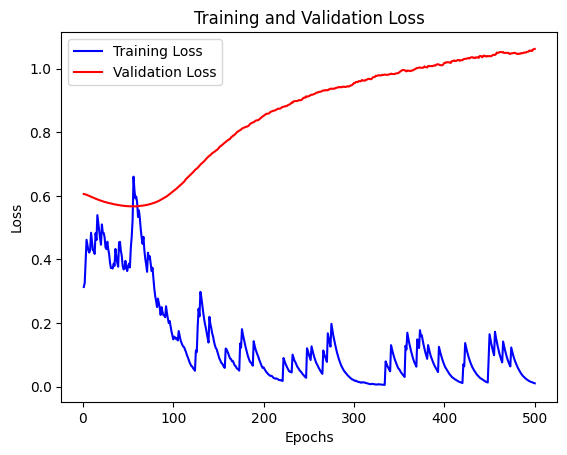

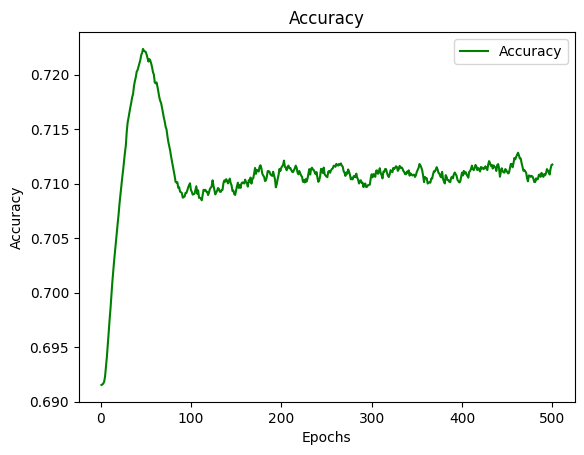

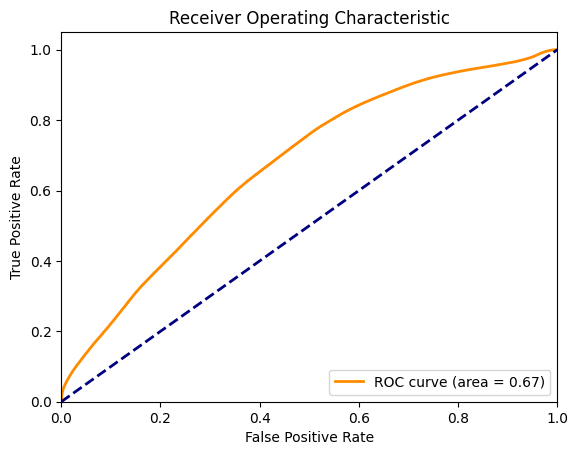

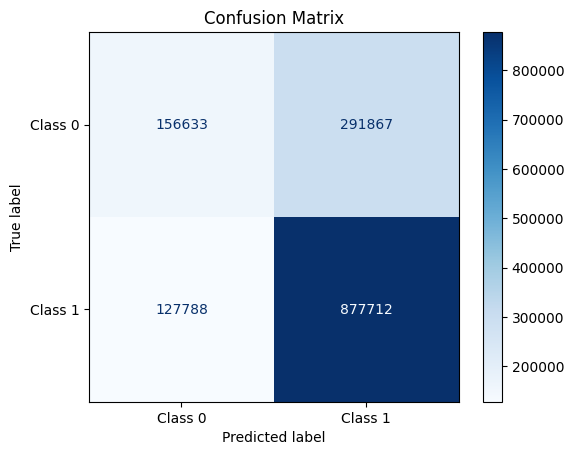

In [5]:

import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


# Generate plots
epochs = range(1, len(train_losses) + 1)

# Plot for Training and Validation Loss
plt.figure()
plt.plot(epochs, smooth_curve(train_losses), 'b-', label='Training Loss')
plt.plot(epochs, smooth_curve(val_losses), 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot for Validation Accuracy
plt.figure()
plt.plot(epochs, smooth_curve([accuracy.cpu().item() for accuracy in accuracies]), 'g-', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Plot for F1 Score
# plt.figure()
# plt.plot(epochs, smooth_curve(f1_scores), 'm-', label='Smoothed F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.title('F1 Score')
# plt.legend()
# plt.show()

# # Plot for Precision
# plt.figure()
# plt.plot(epochs, smooth_curve(precisions), 'c-', label='Smoothed Precision')
# plt.xlabel('Epochs')
# plt.ylabel('Precision')
# plt.title('Precision')
# plt.legend()
# plt.show()

# # Plot for Recall
# plt.figure()
# plt.plot(epochs, smooth_curve(recalls), 'y-', label='Smoothed Recall')
# plt.xlabel('Epochs')
# plt.ylabel('Recall')
# plt.title('Recall')
# plt.legend()
# plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, [1 if prob > 0.5 else 0 for prob in predicted_probs])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
